<a href="https://colab.research.google.com/github/JeffyWongo/CS105-project/blob/main/Copy_of_AdultIncomeEDA%26Predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collection

## Importing Dependencies

In [ ]:
!pip install aequitas
!pip install tabulate

In [ ]:
import seaborn as sns
sns.__version__

'0.13.1'

In [ ]:
import numpy as np
np.__version__

'1.23.5'

In [ ]:
import pandas as pd
pd.__version__

'1.5.3'

In [ ]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.__version__

'3.7.1'

In [ ]:
from tabulate import tabulate

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
import aequitas as aq
from aequitas.preprocessing import preprocess_input_df
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.plotting import Plot
from aequitas.fairness import Fairness
from aequitas import Audit

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline

## Importing Data

In [ ]:
data = pd.read_csv('/content/drive/My Drive/adult.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## About The Data

| Variable    | Description |
| ----------- | ----------- |
| Age| Describes the age of individuals. Continuous.
| Workclass| Private, Self-emp-not-inc, Self-emp-inc, | Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
| fnlwgt| Continuous.
| education| Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num| Number of years spent in education. Continuous.
marital-status| Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
| occupation| Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, <br>Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
| relationship| Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
| race| White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
| sex| Female, Male.
| capital-gain| Continuous.
| capital-loss| Continuous.
| hours-per-week| Continuous.
| native-country| United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal,<br> Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
| salary| >50K,<=50K



# Data Cleaning

In [ ]:
# Choosing Features
selected_columns = ['age', 'education', 'occupation', 'race', 'sex', 'hours.per.week', 'native.country', 'income']
data = data[selected_columns]

In [ ]:
data.replace('?', pd.NA, inplace=True)

missing_values = data.isnull().sum()
print(missing_values)

age                  0
education            0
occupation        1843
race                 0
sex                  0
hours.per.week       0
native.country     583
income               0
dtype: int64


<ipython-input-105-c4bec46f90a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace('?', pd.NA, inplace=True)


In [ ]:
# Drop rows with missing values
data = data.dropna()
data.head()

,age,education,occupation,race,sex,hours.per.week,native.country,income
1,82,HS-grad,Exec-managerial,White,Female,18,United-States,<=50K
3,54,7th-8th,Machine-op-inspct,White,Female,40,United-States,<=50K
4,41,Some-college,Prof-specialty,White,Female,40,United-States,<=50K
5,34,HS-grad,Other-service,White,Female,45,United-States,<=50K
6,38,10th,Adm-clerical,White,Male,40,United-States,<=50K


In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

age               0
education         0
occupation        0
race              0
sex               0
hours.per.week    0
native.country    0
income            0
dtype: int64


# Data Preprocessing

In [ ]:
print(data['race'].value_counts())

White                 25933
Black                  2817
Asian-Pac-Islander      895
Amer-Indian-Eskimo      286
Other                   231
Name: race, dtype: int64


In [ ]:
# # Get the count of each race
# race_counts = data['race'].value_counts()

# # Calculate the target number of samples per race (the minimum count)
# target_count = race_counts.min()

# # Sample from each race to even out the dataframe
# data = pd.concat([data[data['race'] == race].sample(target_count) for race in race_counts.index])

In [ ]:
data['race'].value_counts()

White                 25933
Black                  2817
Asian-Pac-Islander      895
Amer-Indian-Eskimo      286
Other                   231
Name: race, dtype: int64

In [ ]:
data.reset_index(inplace=True, drop=True)

In [ ]:
data['income'] = data['income'].apply(lambda x: 0 if x == '<=50K' else 1)

In [ ]:
data.head()

,age,education,occupation,race,sex,hours.per.week,native.country,income
0,82,HS-grad,Exec-managerial,White,Female,18,United-States,0
1,54,7th-8th,Machine-op-inspct,White,Female,40,United-States,0
2,41,Some-college,Prof-specialty,White,Female,40,United-States,0
3,34,HS-grad,Other-service,White,Female,45,United-States,0
4,38,10th,Adm-clerical,White,Male,40,United-States,0


In [ ]:
# Create df for Aequitas
df_audit = data.copy()

In [ ]:
df_audit.head()

,age,education,occupation,race,sex,hours.per.week,native.country,income
0,82,HS-grad,Exec-managerial,White,Female,18,United-States,0
1,54,7th-8th,Machine-op-inspct,White,Female,40,United-States,0
2,41,Some-college,Prof-specialty,White,Female,40,United-States,0
3,34,HS-grad,Other-service,White,Female,45,United-States,0
4,38,10th,Adm-clerical,White,Male,40,United-States,0


In [ ]:
# Initialize LabelEncoder and Encode Education Column
label_encoder = LabelEncoder()

transformed_cols = []

original_mappings = {}

encoded_data = data

for column in data.columns:
    if data[column].dtype == 'object':
        transformed_cols.append(column)
        encoded_data[column] = label_encoder.fit_transform(data[column])
        original_mappings[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))



print("Tranformed Columns:", transformed_cols)

for column, mapping in original_mappings.items():
    table = [[label, encoded_value] for label, encoded_value in mapping.items()]
    print(f"\n{column}:")
    print(tabulate(table, headers=["Label", "Encoded Value"], tablefmt="grid"))

Tranformed Columns: ['education', 'occupation', 'race', 'sex', 'native.country']

education:
+--------------+-----------------+
| Label        |   Encoded Value |
+==============+=================+
| 10th         |               0 |
+--------------+-----------------+
| 11th         |               1 |
+--------------+-----------------+
| 12th         |               2 |
+--------------+-----------------+
| 1st-4th      |               3 |
+--------------+-----------------+
| 5th-6th      |               4 |
+--------------+-----------------+
| 7th-8th      |               5 |
+--------------+-----------------+
| 9th          |               6 |
+--------------+-----------------+
| Assoc-acdm   |               7 |
+--------------+-----------------+
| Assoc-voc    |               8 |
+--------------+-----------------+
| Bachelors    |               9 |
+--------------+-----------------+
| Doctorate    |              10 |
+--------------+-----------------+
| HS-grad      |              11

In [ ]:
data.head()

,age,education,occupation,race,sex,hours.per.week,native.country,income
0,82,11,3,4,0,18,38,0
1,54,5,6,4,0,40,38,0
2,41,15,9,4,0,40,38,0
3,34,11,7,4,0,45,38,0
4,38,0,0,4,1,40,38,0


In [ ]:
X = encoded_data[['age', 'education', 'occupation', 'race', 'sex', 'hours.per.week', 'native.country']]
y = encoded_data['income']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train['race'].value_counts()

4    20736
2     2260
1      723
0      223
3      187
Name: race, dtype: int64

In [ ]:
# Trying to balance the data
# smote = SMOTE(random_state=42)

# X_train, y_train = smote.fit_resample(X_train, y_train)
# X_test, y_test = smote.fit_resample(X_test, y_test)

In [ ]:
X_train['race'].value_counts()

4    20736
2     2260
1      723
0      223
3      187
Name: race, dtype: int64

# Data Analysis

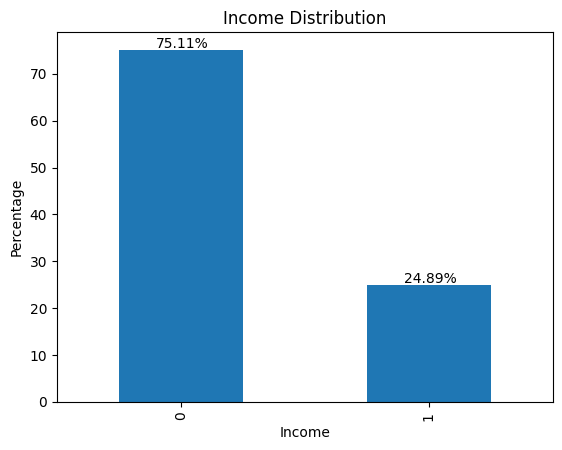

In [ ]:
income_distribution = data['income'].value_counts(normalize=True) * 100
ax = income_distribution.plot(kind='bar')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Percentage')
for i in ax.patches:
    plt.text(i.get_x() + 0.15, i.get_height() + 0.5, str(round(i.get_height(), 2)) + '%', fontsize=10, color='black')
plt.show()

ValueError: Could not interpret value `label_value` for `hue`. An entry with this name does not appear in `data`.

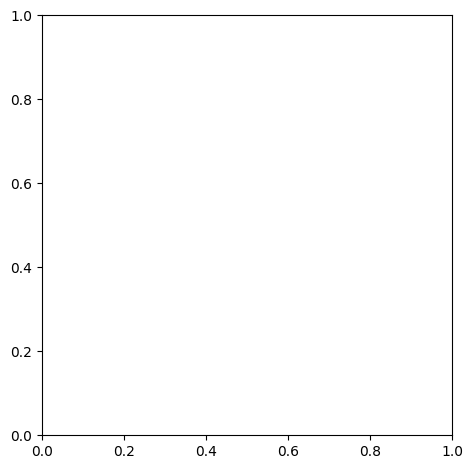

In [ ]:
aq_palette = sns.diverging_palette(225, 35, n=2)

plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
label_by_race = sns.countplot(x="race", hue="label_value", data=df_audit, palette=aq_palette)
label_by_race.set_xticklabels(label_by_race.get_xticklabels(), rotation=90)

plt.subplot(2, 3, 2)
label_by_age = sns.countplot(x="sex", hue="label_value", data=df_audit, palette=aq_palette)
label_by_age.set_xticklabels(label_by_age.get_xticklabels(), rotation=90)

plt.subplot(2, 3, 3)
label_by_sex = sns.countplot(x="age", hue="label_value", data=df_audit, palette=aq_palette)
label_by_sex.set_xticklabels(label_by_sex.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

<ipython-input-124-cc4cc80ab20e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='income_label', y='age', data=data, palette='muted')


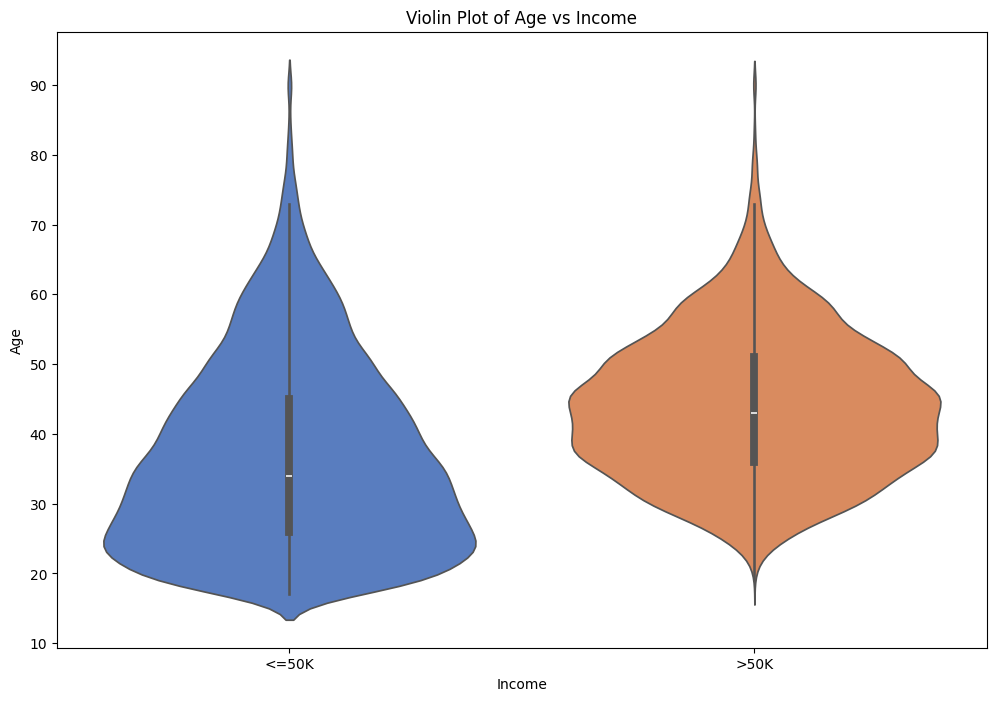

In [ ]:
data['income_label'] = data['income'].map({0: '<=50K', 1: '>50K'})

plt.figure(figsize=(12, 8))
sns.violinplot(x='income_label', y='age', data=data, palette='muted')
plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Violin Plot of Age vs Income')
plt.show()

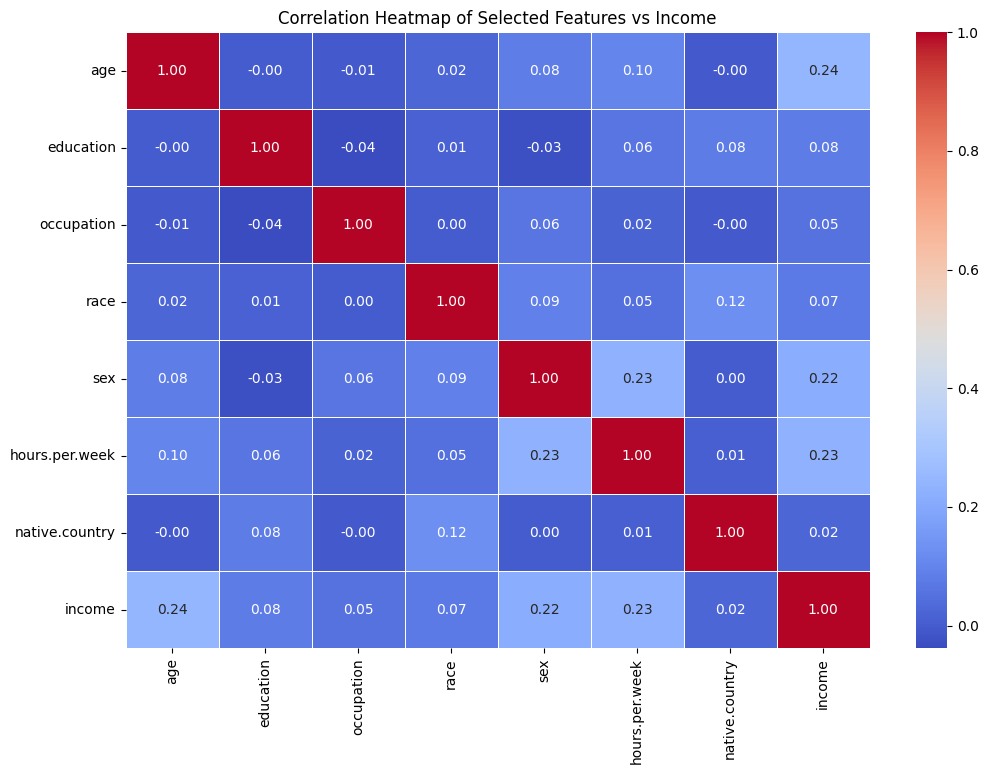

In [ ]:
selected_features = ['age', 'education', 'occupation', 'race', 'sex', 'hours.per.week', 'native.country', 'income']

subset_data = encoded_data[selected_features]

plt.figure(figsize=(12, 8))
sns.heatmap(subset_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Selected Features vs Income')
plt.show()

# Logisitic Regression

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Make predictions on the test set
predictions = lr_model.predict(X_test)

In [ ]:
# Evaluate model accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7487153986408089


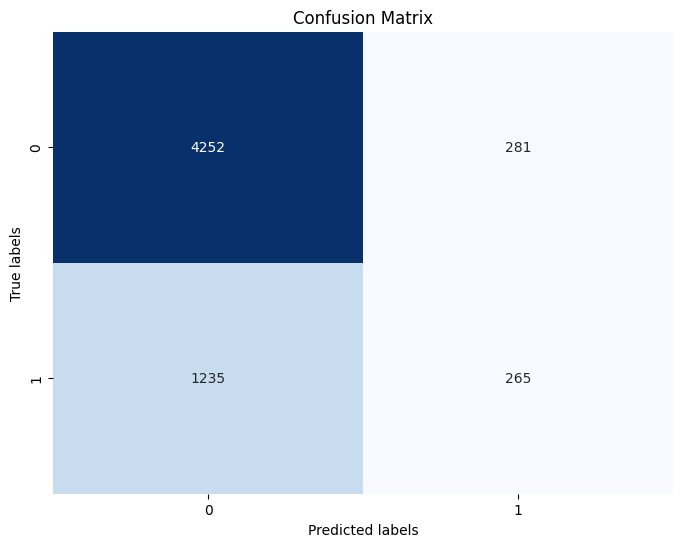

In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [ ]:
# Classification report
class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.94      0.85      4533
           1       0.49      0.18      0.26      1500

    accuracy                           0.75      6033
   macro avg       0.63      0.56      0.55      6033
weighted avg       0.70      0.75      0.70      6033



# Prediction Model

In [ ]:
# Create Model Architecture
alpha = 5
model = tf.keras.Sequential([
    tf.keras.layers.Dense(14, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(alpha), input_shape=(X_train.shape[1], )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(7, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(alpha)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(alpha)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Intialize Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
# Compile the model
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
604/604 [==============================] - 12s 13ms/step - loss: 42.1766 - accuracy: 0.6995 - val_loss: 5.3154 - val_accuracy: 0.7580
Epoch 2/20
604/604 [==============================] - 6s 10ms/step - loss: 1.7656 - accuracy: 0.7493 - val_loss: 0.6284 - val_accuracy: 0.7580
Epoch 3/20
604/604 [==============================] - 4s 7ms/step - loss: 0.5804 - accuracy: 0.7493 - val_loss: 0.5546 - val_accuracy: 0.7580
Epoch 4/20
604/604 [==============================] - 4s 6ms/step - loss: 0.5647 - accuracy: 0.7493 - val_loss: 0.5538 - val_accuracy: 0.7580
Epoch 5/20
604/604 [==============================] - 4s 7ms/step - loss: 0.5639 - accuracy: 0.7493 - val_loss: 0.5537 - val_accuracy: 0.7580
Epoch 6/20
604/604 [==============================] - 3s 6ms/step - loss: 0.5638 - accuracy: 0.7493 - val_loss: 0.5536 - val_accuracy: 0.7580
Epoch 7/20
604/604 [==============================] - 3s 5ms/step - loss: 0.5642 - accuracy: 0.7493 - val_loss: 0.5538 - val_accuracy: 0.7580
Ep

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

189/189 [==============================] - 0s 2ms/step - loss: 0.5608 - accuracy: 0.7514
Test accuracy: 0.751367449760437


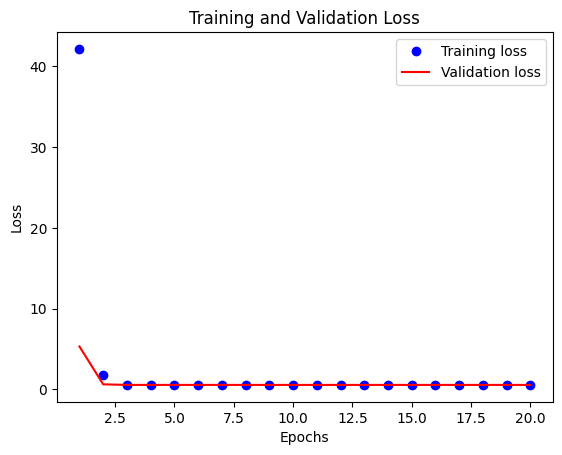

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Test One Prediction
idx = 453
test = X.iloc[idx].values.reshape(1, -1)
real = y.iloc[idx]
print(test)
pred = model.predict(test)
print("Prediction:", pred)
print("Real:", real)

[[36 12  0  4  1 40 23]]
1/1 [==============================] - 0s 73ms/step
Prediction: [[0.2490864]]
Real: 1


189/189 [==============================] - 0s 1ms/step


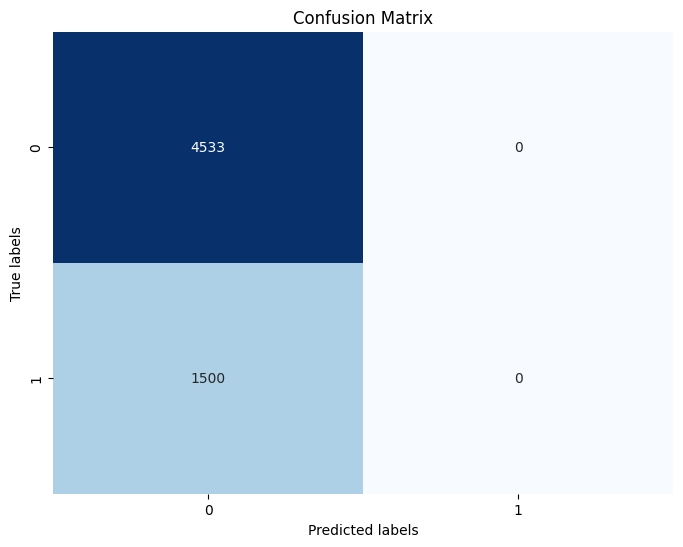

In [ ]:
# Plot confusion matrix
predictions = model.predict(X_test).round().astype(int)
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

# Fairness Analysis

In [ ]:
model.get_weights()

[array([[-2.1511595e-12,  1.3762325e-10,  1.0147588e-36,  6.9261918e-10,
         -3.2519236e-37, -2.4983591e-37, -5.1574312e-37, -7.4951249e-37,
         -3.5097359e-38,  9.4025844e-37,  8.2009618e-37,  2.4539193e-37,
          1.2565706e-37, -1.8659349e-12],
        [ 5.2941644e-12,  3.2527602e-11,  4.9268488e-37,  6.7727733e-12,
          6.0557743e-37, -2.0877710e-37, -4.3131729e-37, -4.3220122e-38,
          3.1942116e-37,  2.4929732e-37,  3.6599429e-37,  8.4192496e-37,
          2.4625469e-37, -5.0285753e-10],
        [-4.1200810e-13, -7.4136166e-12, -6.7061156e-38,  1.1892676e-10,
         -4.1643658e-37,  1.7770811e-37, -6.6605998e-37, -3.2764576e-37,
         -8.0163196e-37,  1.1406067e-36, -4.5849015e-37, -9.8969843e-38,
         -4.8879277e-37, -9.7989867e-13],
        [-1.2635666e-13,  1.8225521e-12,  2.6066481e-37,  9.3697168e-12,
         -6.0973765e-37,  9.6801124e-37,  3.1347230e-37, -7.6512448e-37,
          1.3763846e-37,  4.8315977e-37, -2.5711343e-37,  8.5036064e-37

In [ ]:
# Preparing Data for Aequitas
df_audit = df_audit.rename(columns={'income': 'label'})
df_audit['score'] = model.predict(X).round().astype(int)

df_audit.head(100)

943/943 [==============================] - 1s 1ms/step


,age,education,occupation,race,sex,hours.per.week,native.country,label,score
0,82,HS-grad,Exec-managerial,White,Female,18,United-States,0,0
1,54,7th-8th,Machine-op-inspct,White,Female,40,United-States,0,0
2,41,Some-college,Prof-specialty,White,Female,40,United-States,0,0
3,34,HS-grad,Other-service,White,Female,45,United-States,0,0
4,38,10th,Adm-clerical,White,Male,40,United-States,0,0
...,...,...,...,...,...,...,...,...,...
95,50,Bachelors,Exec-managerial,White,Female,20,United-States,1,0
96,47,Bachelors,Exec-managerial,White,Male,60,United-States,1,0
97,47,Prof-school,Prof-specialty,White,Male,45,United-States,1,0
98,67,Bachelors,Exec-managerial,White,Male,40,United-States,1,0


In [ ]:
audit = Audit(df_audit)

ValueError: Sensitive attribute column(s) Index(['age', 'education', 'occupation', 'race', 'sex', 'hours.per.week',
       'native.country'],
      dtype='object') must be categorical.

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(df_audit.index, df_audit['score'], color='skyblue')
plt.title('Barplot of Audit Score')
plt.xlabel('Sample Index')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

In [ ]:
# Preprocessing Data for Aequitas
aeq_data = preprocess_input_df(df_audit)

In [ ]:
# Specifying Sensitive Attributes
aeq_group = Group()

# Generate crosstabs
xtab, _ = aeq_group.get_crosstabs(df_audit)

# Compute metrics
absolute_metrics = aeq_group.list_absolute_metrics(xtab)

# Displays crosstab info for confusion matrix metrics + metadata
xtab[[col for col in xtab.columns if col not in absolute_metrics]]

In [ ]:
xtab_with_metrics = xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)

In [ ]:
xtab_with_metrics

In [ ]:
aq_palette = sns.diverging_palette(225, 35, n=2)

plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
label_by_race = sns.countplot(x="race", hue="label_value", data=df_audit, palette=aq_palette)
label_by_race.set_xticklabels(label_by_race.get_xticklabels(), rotation=90)

plt.subplot(2, 3, 2)
label_by_age = sns.countplot(x="sex", hue="label_value", data=df_audit, palette=aq_palette)
label_by_age.set_xticklabels(label_by_age.get_xticklabels(), rotation=90)

plt.subplot(2, 3, 3)
label_by_sex = sns.countplot(x="age", hue="label_value", data=df_audit, palette=aq_palette)
label_by_sex.set_xticklabels(label_by_sex.get_xticklabels(), rotation=90)

plt.subplot(2, 3, 4)
by_race = sns.countplot(x="race", hue="score", data=df_audit, palette=aq_palette)
by_race.set_xticklabels(by_race.get_xticklabels(), rotation=90)

plt.subplot(2, 3, 5)
by_sex = sns.countplot(x="sex", hue="score", data=df_audit, palette=aq_palette)
by_sex.set_xticklabels(by_sex.get_xticklabels(), rotation=90)

plt.subplot(2, 3, 6)
by_age = sns.countplot(x="age", hue="score", data=df_audit, palette=aq_palette)
by_age.set_xticklabels(by_age.get_xticklabels(), rotation=90)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [ ]:
# Plotting fairness metrics
aqp = Plot()
plt.figure(figsize=(16, 10))

In [ ]:
plot = aqp.plot_group_metric(xtab, 'fpr', min_group_size = 0.00001)

In [ ]:
# Create Bias object
bias = Bias()

# Define crosstab that contains disparities with respect to reference categories for each variable
bdf = bias.get_disparity_predefined_groups(xtab, original_df=df_audit,
                                        ref_groups_dict={'race':'White', 'sex':'Male', 'age':'28.00-37.00', 'education':'Doctorate', 'hours.per.week':'40.00-45.00', 'native.country':'United-States', 'occupation':'Sales'},
                                        alpha=0.05, check_significance=True,
                                        mask_significance=True)
bdf[['attribute_name', 'attribute_value'] +
     bias.list_disparities(bdf) + bias.list_significance(bdf)].style

In [ ]:
plot = aqp.plot_disparity(bdf, group_metric='fnr_disparity', attribute_name='race', significance_alpha=0.0001)

In [ ]:
# Create Fairness object
fair = Fairness()

# Define fairness crosstab
fdf = fair.get_group_value_fairness(bdf)

# Compute parities
parity_detrminations = fair.list_parities(fdf)

# Grab parities
gaf = fair.get_group_attribute_fairness(fdf)
gaf

In [ ]:
aqp.plot_fairness_disparity_all(fdf, attributes=['race'], metrics='all',
                                       significance_alpha=0.05)

# Revisions